### Name: Shubham Shetty
### UID: 2018130050
### Batch: B

### Objective:
Based on competition available at Kaggle, https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description, revolving around predicting the house price through regression techniques. your objective is to build a regression model and measure the performance of the model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Data Science Tutorials/house-prices-advanced-regression-techniques')

In [3]:
!ls

data_description.txt   submission.csv	     test.csv
sample_submission.csv  submission_final.csv  train.csv


In [4]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor, Lasso, ElasticNet
from xgboost import XGBRegressor

# To Avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Data preparation and preprocessing

train.csv - the training set


test.csv - the test set


data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here


sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

In [5]:
#Loading data

test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_data = train_data.drop(['Id'] , axis =1)
test_data = test_data.drop(['Id'] , axis =1)

In [7]:
# Checking the number of rows and columns

print('Number of rows:', train_data.shape[0])
print('Number of columns:', train_data.shape[1])

Number of rows: 1460
Number of columns: 80


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
#Extracting numerical data
train_data = train_data.select_dtypes(include=['int64', 'float64'])
test_data =  test_data.select_dtypes(include=['int64', 'float64'])

In [10]:
train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
#Looking for missing data
train_data.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [13]:
#Looking for missing data
test_data.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

### Replacing null values.

In [14]:
#Filling null values with median
test_data.fillna(test_data.median(), inplace = True)
test_data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [15]:
#Filling null values with median
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median())

Both cells serve the same purpose - filling null values - but they are just written in different ways.

In [16]:
#Looking for duplicates
sum(train_data.duplicated())

0

In [17]:
#Splitting
x = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

## Skewness

In [18]:
#Checking for skewness
skewed_features = [col for col in train_data.columns if train_data[col].skew() > 0.5]
print(len(skewed_features))

27


In [19]:
train_data[skewed_features] = train_data[skewed_features].apply(lambda x: np.log1p(x))

Taking the log makes the data **less** skewed

In [20]:
skewed_features.remove('SalePrice')

In [21]:
test_data[skewed_features] = test_data[skewed_features].apply(lambda x: np.log1p(x))

In [22]:
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
#Splitting the dataset into the Training set and Test set
x = train_data.drop('SalePrice', axis = 1)
y = train_data['SalePrice']

## Scaling

In [24]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

Many machine learning algorithms as Linear Regression performs better when numerical input variables are scaled to a standard range.

In [25]:
test_data = sc.transform(test_data)

# Linear Regression 

In [26]:
#cross validation
lr = LinearRegression()
cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([0.03323102, 0.00432801, 0.00430942, 0.00404406, 0.00416994,
        0.0041008 , 0.00407672, 0.00400925, 0.00400567, 0.00404668]),
 'score_time': array([0.00170922, 0.00168753, 0.00107622, 0.00108671, 0.00114083,
        0.00106883, 0.00109673, 0.00108004, 0.00105619, 0.00145268]),
 'test_neg_mean_squared_error': array([-0.01762168, -0.01329434, -0.01455703, -0.02857214, -0.02350528,
        -0.01650958, -0.01522591, -0.01464452, -0.03396996, -0.01902501]),
 'test_neg_root_mean_squared_error': array([-0.13274667, -0.11530108, -0.12065251, -0.16903296, -0.15331432,
        -0.1284896 , -0.12339333, -0.12101456, -0.1843094 , -0.13793119])}

In [27]:
 cv_score['test_neg_root_mean_squared_error'].mean()

-0.13861856201527376

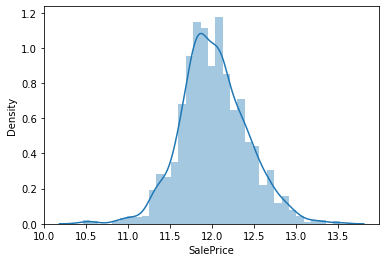

In [28]:
#Checking data skewness
sns.distplot(y)

Distribution shows positive skewness

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [30]:
model.score(x, y)

0.8860406993795062

In [31]:
y_pred = model.predict(x)
y_pred

array([12.26354905, 12.17866885, 12.32404922, ..., 12.28162312,
       11.77022057, 11.8889255 ])

In [32]:
r2_score(y, y_pred)

0.8860406993795062

In [33]:
mean_squared_error(y,y_pred, squared=False)

0.13479933233010669

In [34]:
valid_pred = model.predict(x)

In [35]:
r2_score(y,valid_pred)

0.8860406993795062

# Lasso before regularization

In [40]:
lr = Lasso()
cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([0.01030087, 0.00786161, 0.00843883, 0.00635195, 0.00768161,
        0.00537181, 0.00497937, 0.00246143, 0.0045774 , 0.00308204]),
 'score_time': array([0.0013926 , 0.00240755, 0.00234079, 0.00266814, 0.00120854,
        0.00114655, 0.00118899, 0.00106978, 0.00142121, 0.0011797 ]),
 'test_neg_mean_squared_error': array([-0.14341533, -0.15630501, -0.18018288, -0.18129443, -0.20644308,
        -0.12964349, -0.15215326, -0.14038881, -0.14419366, -0.16252923]),
 'test_neg_root_mean_squared_error': array([-0.37870216, -0.39535428, -0.42447954, -0.42578684, -0.45436008,
        -0.3600604 , -0.39006828, -0.37468495, -0.3797284 , -0.40314914])}

In [41]:
 cv_score['test_neg_root_mean_squared_error'].mean()

-0.3986374079901046

# Lasso after regularization

In [60]:
#Lasso after regularization
lr = Lasso(alpha = 0.001)
cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score


{'fit_time': array([0.01461792, 0.00765109, 0.0081532 , 0.00739574, 0.00798798,
        0.00782585, 0.0077641 , 0.00774288, 0.00690246, 0.0075593 ]),
 'score_time': array([0.00134635, 0.00118494, 0.00121093, 0.00113201, 0.00113058,
        0.00117493, 0.00112772, 0.001122  , 0.00110149, 0.00111747]),
 'test_neg_mean_squared_error': array([-0.01760248, -0.01307937, -0.01458151, -0.02839255, -0.02360642,
        -0.0162101 , -0.01526653, -0.0146631 , -0.03369376, -0.01863838]),
 'test_neg_root_mean_squared_error': array([-0.13267433, -0.11436505, -0.12075392, -0.16850088, -0.1536438 ,
        -0.1273189 , -0.12355779, -0.1210913 , -0.18355859, -0.13652246])}

In [61]:
 cv_score['test_neg_root_mean_squared_error'].mean()

-0.13819870387313646

## Eventually, fitting the data to the chosen ML model 'lasso' to get final results

In [64]:
LR = Lasso(alpha = 0.001)
LR.fit(x, y)

Lasso(alpha=0.001)

In [68]:
LR.score(x,y)

0.8856588970809361

In [55]:
y_pred = np.expm1(svr_linear_model.predict(test_data))
y_pred

array([124425.98448813, 161387.91442933, 174320.79709768, ...,
       170215.57103686, 136894.85339343, 227639.80968725])

In [56]:
submission = pd.DataFrame({'Id': range(1461, 1461 + len(test_data)), 'SalePrice': y_pred})

In [57]:
submission.to_csv('submission_final.csv', index = False)

### Conclusion


*   Learnt how different ways of cleaning can affect the accuracy of the models.
*   Learnt why scaling, checking skewness of the data is very important for the model to learn the data properly.
*   Had never tried the Lasso model before but got a chance to learn and implement it on this dataset.

